<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/18_Noy_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [ ]:
mnist = fetch_openml('mnist_784')
data = mnist.data.astype('float32')
target = mnist.target.astype('int')

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_pca)

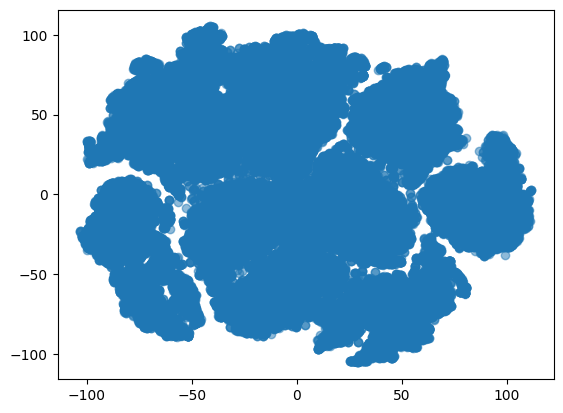

In [ ]:
tsne_df = pd.DataFrame(X_tsne, columns=['col_1', 'col_2'])

plt.scatter(tsne_df['col_1'],
            tsne_df['col_2'],
            alpha=0.5
            )
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_tsne)

KMeans(n_clusters=10, random_state=42)

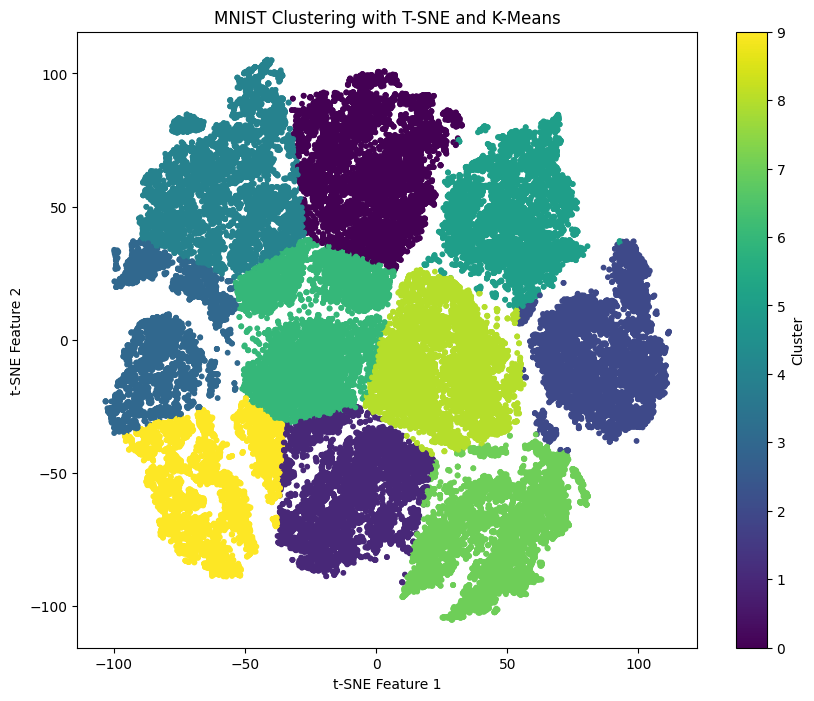

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('MNIST Clustering with T-SNE and K-Means')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

Haqiqiy classlar bilan solishtirish.

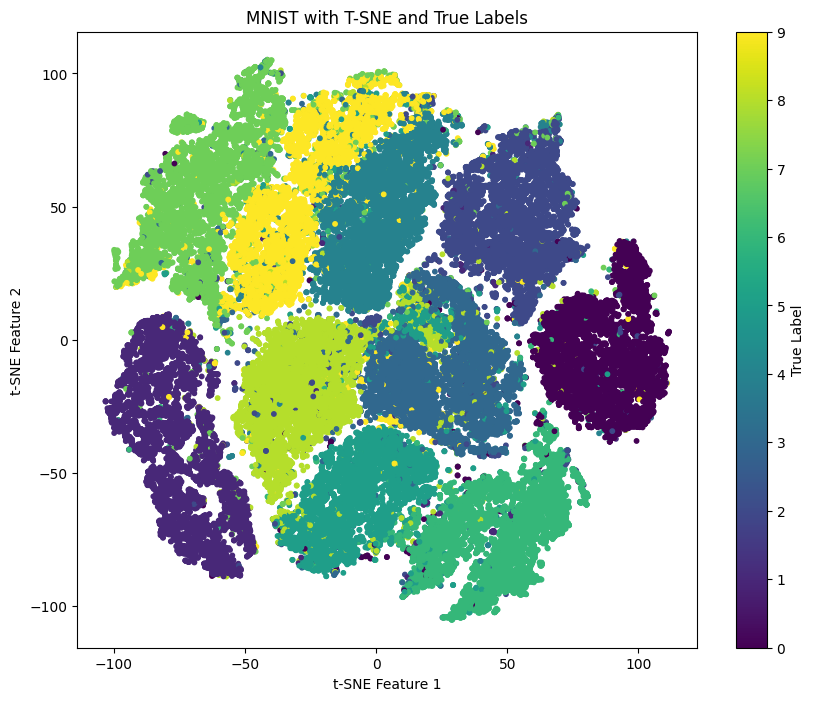

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target, cmap='viridis', s=10)
plt.colorbar(label='True Label')
plt.title('MNIST with T-SNE and True Labels')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [ ]:
predict_label = kmeans.predict(X_tsne)

In [ ]:
error = (target != predict_label).sum()
error

69238

In [ ]:
correct = (target == predict_label).sum()
correct

762

In [ ]:
accurace = correct / len(target)
accurace

0.010885714285714285

In [ ]:
conf_matrix = confusion_matrix(target, predict_label)
conf_matrix

array([[   3,   36, 6772,    2,    2,   22,    4,   38,   20,    4],
       [  22,    4,    1, 3154,    8,   47,    7,   28,    6, 4600],
       [  47,   25,  182,   22,   24, 6409,  126,   53,   77,   25],
       [  30,   84,    7,   44,   51,   47,  196,  213, 6453,   16],
       [4848,   19,    5,   24,   48,   72, 1756,   29,    5,   18],
       [  67, 5269,   21,   11,   17,   15,   43,  178,  673,   19],
       [  14,  199,  171,    4,    0,   15,    8, 6445,   13,    7],
       [ 221,    4,   10, 1431, 5480,   60,   36,    4,   16,   31],
       [  43,  927,   29,   23,   13,   46, 4109,   17,  447, 1171],
       [3076,   14,   16,  200, 2019,   21, 1486,    2,  117,    7]])

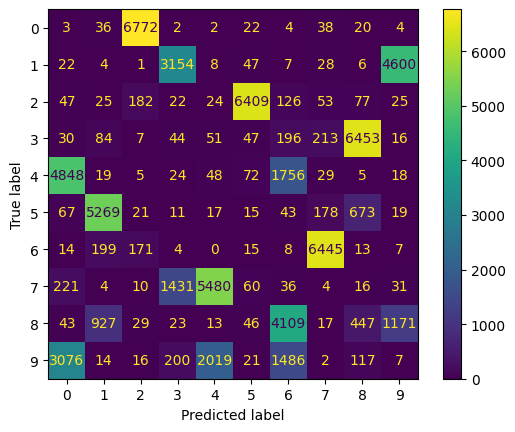

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

Kmeans claslarni ajrata olmoqda nisbatan, faqat classa labelini almashib qolgan.
PCA va TSNE orqaliy kup kichiklashtirildi agar sal kuproq ma'lumot qoldirilsa yaxshiroq ajrata olishi mumkun.